In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#importing csv file
myopia_df = pd.read_csv("Data/myopia.csv")
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
#checking for null values
myopia_df.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

In [4]:
#dropping of the Myopic column
myopia_fixed_df = myopia_df.drop(columns="MYOPIC", axis=1)
myopia_fixed_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [5]:
#Feature variables and target variable
target = myopia_df['MYOPIC']

#Standard Scalar fit
scaler = StandardScaler()
scaler.fit(myopia_fixed_df)

featuresscaled = scaler.transform(myopia_fixed_df)

In [6]:
#PCA and providing explained variance ratio
pca = PCA(n_components=0.90)

featurepca = pca.fit_transform(featuresscaled)

print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')

Explained Variance Ratio: [0.21177355 0.15659716 0.08688023 0.08301762 0.07584858 0.06997878
 0.06486986 0.06377808 0.05393666 0.05205566]


In [7]:
#Utilization of TSNE
tsne = TSNE(learning_rate=100)

feature_tsne = tsne.fit_transform(featurepca)

/Users/robert.casiano3/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [8]:
#Adding transformed features to dataframe
myopia_fixed_df['x']  = feature_tsne[:,0]
myopia_fixed_df['y'] = feature_tsne[:,1]
myopia_fixed_df['class'] = myopia_df['MYOPIC']

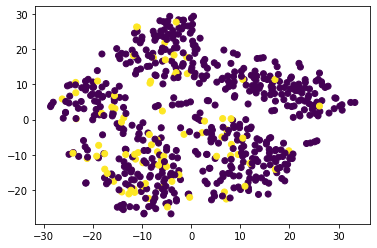

In [9]:
#Plotting scatter plot
plt.scatter(x = myopia_fixed_df['x'], y = myopia_fixed_df['y'], c = myopia_fixed_df['class'])
plt.show()

Based upon this initial plot, we are unable to identify any distintive clusters.

In [10]:
#Creating a dataframe with two principal components
myopiadf_pca = pd.DataFrame(feature_tsne, columns=["pc1", "pc2"])
myopiadf_pca.head()

,pc1,pc2
0,7.135600,-22.590158
1,-5.516670,-12.541482
2,18.413227,7.169899
3,-8.366635,10.333126
4,8.445364,-0.203146


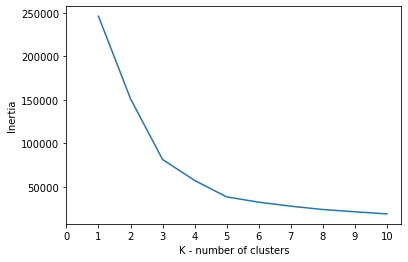

In [11]:
#Utilizing a for loop to help determine K value and calculating the inertia for the K values range
inertia = []

k = list(range(1, 11))

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=40)
    kmeans.fit(myopiadf_pca)
    inertia.append(kmeans.inertia_)
    

# create dataframe for elbow curve
curve_data = {"k": k, "inertia": inertia}

curve_data_df = pd.DataFrame(curve_data)

# PLOT
plt.plot(curve_data_df['k'], curve_data_df['inertia'])
plt.xticks(list(range(11)))
plt.xlabel("K - number of clusters")
plt.ylabel("Inertia")
plt.show()

In [12]:
#Prediction of Clusters
km_model = KMeans(n_clusters=5, random_state=40)
km_model.fit(myopiadf_pca)
predicted_clusters = km_model.predict(myopiadf_pca)
myopiadf_pca['class'] = km_model.labels_
myopiadf_pca.head()

,pc1,pc2,class
0,7.135600,-22.590158,1
1,-5.516670,-12.541482,4
2,18.413227,7.169899,2
3,-8.366635,10.333126,0
4,8.445364,-0.203146,1


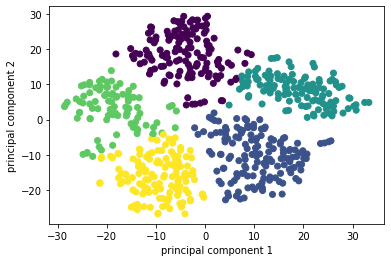

In [13]:
# Plotting clusters

plt.scatter(x = myopiadf_pca['pc1'], y = myopiadf_pca['pc2'], c = myopiadf_pca['class'])
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()

Recommendation: Based upon the analysis completed, the patients can be clustered with a recommendation of being clustered in groups of 5